In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use("fivethirtyeight")

In [2]:
county_data = pd.read_csv("../data/aggregated_county_data.csv")

In [7]:
county_data.fips = county_data.fips.astype(str)
for ix, row in county_data.iterrows():
    if len(row["fips"]) == 4:
        new_fips = "0" + row["fips"]
        county_data.at[ix, "fips"] = new_fips

In [3]:
svi_file = "../data/SVI2018_US_COUNTY.csv"
svi = pd.read_csv(svi_file)
keeps = [x for x in svi.columns if "EP_" in x]
keeps += ["FIPS"]
drops = [x for x in svi.columns if x not in keeps]
svi.FIPS = svi.FIPS.astype(str)
svi.rename({"FIPS" : "fips"}, axis=1, inplace=True)
svi.drop(drops, axis=1, inplace=True)
for ix, row in svi.iterrows():
    if len(row["fips"]) == 4:
        new_fips = "0" + row["fips"]
        svi.at[ix, "fips"] = new_fips

In [8]:
aggregated = county_data.merge(svi, on="fips")

In [11]:
aggregated.drop(aggregated.columns[0], axis=1, inplace=True)

In [15]:
white = aggregated.sort_values(by="WA_TOTAL_PCT", ascending=False)
top1pct_white = white.head(31)
stats_white = pd.DataFrame(top1pct_white.describe())
mean_white = stats_white.loc["mean"]

In [24]:
black = aggregated.sort_values(by='BA_TOTAL_PCT', ascending=False)
top1pct_black = black.head(31)
stats_black = pd.DataFrame(top1pct_black.describe())
mean_black = stats_black.loc["mean"]

In [26]:
indigenous = aggregated.sort_values(by='IA_TOTAL_PCT', ascending=False)
top1pct_indigenous = indigenous.head(31)
stats_indigenous = pd.DataFrame(top1pct_indigenous.describe())
mean_indigenous = stats_indigenous.loc["mean"]

In [27]:
asian = aggregated.sort_values(by='AA_TOTAL_PCT', ascending=False)
top1pct_asian = asian.head(31)
stats_asian = pd.DataFrame(top1pct_asian.describe())
mean_asian = stats_asian.loc["mean"]

In [28]:
hawaii_PI = aggregated.sort_values(by='NA_TOTAL_PCT', ascending=False)
top1pct_hawaii_PI = hawaii_PI.head(31)
stats_hawaii = pd.DataFrame(top1pct_hawaii_PI.describe())
mean_hawaii = stats_hawaii.loc["mean"]

In [44]:
multi = aggregated.sort_values(by='TOM_TOTAL_PCT', ascending=False)
top1pct_multi = multi.head(31)
stats_multi= pd.DataFrame(top1pct_multi.describe())
mean_multi = stats_multi.loc["mean"]

In [48]:
stats_dict = {
    "Top_1percent_White" : mean_white.values,
    "Top_1percent_Black" : mean_black.values,
    "Top_1percent_Indigenous" : mean_indigenous.values,
    "Top_1percent_Asian" : mean_asian.values,
    "Top_1percent_Hawaiian_PacificIslander" : mean_hawaii.values,
    "Top_1percent_Multiracial" : mean_multi.values
}

In [52]:
mean_hawaii.index

Index(['zero_risk_factors_pct', '1or2_risk_factors_pct',
       'three_plus_risk_factors_pct', 'Estimated hesitant',
       'Estimated hesitant or unsure', 'Estimated strongly hesitant',
       'Social Vulnerability Index (SVI)',
       'CVAC level of concern for vaccination rollout', 'per_biden',
       'per_trump',
       ...
       'EP_DISABL', 'EP_SNGPNT', 'EP_MINRTY', 'EP_LIMENG', 'EP_MUNIT',
       'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_UNINSUR'],
      dtype='object', length=134)

In [53]:
stats_byrace = pd.DataFrame.from_dict(stats_dict, orient="columns")

In [55]:
stats_byrace.set_index(mean_hawaii.index, inplace=True)

In [56]:
stats_byrace.head()

,Top_1percent_White,Top_1percent_Black,Top_1percent_Indigenous,Top_1percent_Asian,Top_1percent_Hawaiian_PacificIslander,Top_1percent_Multiracial
zero_risk_factors_pct,28.594516,19.147742,17.542581,12.998387,20.951935,20.319032
1or2_risk_factors_pct,44.880645,46.521290,49.803548,61.549032,53.931935,50.953226
three_plus_risk_factors_pct,26.526452,34.329677,32.653548,25.452258,25.113871,28.725806
Estimated hesitant,0.130229,0.168387,0.163097,0.066245,0.123519,0.174100
Estimated hesitant or unsure,0.187565,0.261165,0.229571,0.103035,0.170690,0.233384


In [57]:
len(stats_byrace)

134

In [61]:
stats_byrace.index.to_list()

['zero_risk_factors_pct',
 '1or2_risk_factors_pct',
 'three_plus_risk_factors_pct',
 'Estimated hesitant',
 'Estimated hesitant or unsure',
 'Estimated strongly hesitant',
 'Social Vulnerability Index (SVI)',
 'CVAC level of concern for vaccination rollout',
 'per_biden',
 'per_trump',
 'pct_female',
 'pct_male',
 'WA_MALE_PCT',
 'WA_FEMALE_PCT',
 'WA_TOTAL_PCT',
 'BA_MALE_PCT',
 'BA_FEMALE_PCT',
 'BA_TOTAL_PCT',
 'IA_MALE_PCT',
 'IA_FEMALE_PCT',
 'IA_TOTAL_PCT',
 'AA_MALE_PCT',
 'AA_FEMALE_PCT',
 'AA_TOTAL_PCT',
 'NA_MALE_PCT',
 'NA_FEMALE_PCT',
 'NA_TOTAL_PCT',
 'TOM_MALE_PCT',
 'TOM_FEMALE_PCT',
 'TOM_TOTAL_PCT',
 'WAC_MALE_PCT',
 'WAC_FEMALE_PCT',
 'WAC_TOTAL_PCT',
 'BAC_MALE_PCT',
 'BAC_FEMALE_PCT',
 'BAC_TOTAL_PCT',
 'IAC_MALE_PCT',
 'IAC_FEMALE_PCT',
 'IAC_TOTAL_PCT',
 'AAC_MALE_PCT',
 'AAC_FEMALE_PCT',
 'AAC_TOTAL_PCT',
 'NAC_MALE_PCT',
 'NAC_FEMALE_PCT',
 'NAC_TOTAL_PCT',
 'NH_MALE_PCT',
 'NH_FEMALE_PCT',
 'NH_TOTAL_PCT',
 'NHWA_MALE_PCT',
 'NHWA_FEMALE_PCT',
 'NHWA_TOTAL_PCT'

In [59]:
index = stats_byrace.index.to_list()

In [69]:
stats_byrace.drop(index[12:-17], axis=0, inplace=True)

In [70]:
len(stats_byrace)

29

In [75]:
stats_byrace.T.to_csv("../data/stats_byrace.csv")

## Jitter plot

In [87]:
top10pct_white = white.head(310).reset_index()
top10pct_black = black.head(310).reset_index()
top10pct_indigenous = indigenous.head(310).reset_index()
top10pct_asian = asian.head(310).reset_index()
top10pct_hawaii_PI = hawaii_PI.head(310).reset_index()
top10pct_multi = multi.head(310).reset_index()

In [89]:
data = [top10pct_white["Estimated strongly hesitant"], 
        top10pct_black["Estimated strongly hesitant"], 
        top10pct_indigenous["Estimated strongly hesitant"], 
        top10pct_asian["Estimated strongly hesitant"],
        top10pct_hawaii_PI["Estimated strongly hesitant"],
        top10pct_multi["Estimated strongly hesitant"]]

In [90]:
hesitation = pd.DataFrame(data)

In [93]:
hesitation = hesitation.T
hesitation.columns = ["White", "Black", "Indigenous", "Asian", "Hawaiian or Pacific Islander", "Multi-Racial"]

In [108]:
dfs = []
for i in range(len(data)):
    df = pd.DataFrame(data[i])
    race = hesitation.columns[i]
    df["Race"] = race
    dfs.append(df)

In [110]:
plot_data = pd.concat(dfs)

In [116]:
plot_data.rename({"Estimated strongly hesitant" : "Strong Vaccine Hesitance (Percent)"}, axis=1, inplace=True)

In [117]:
plot_data.head()

,Strong Vaccine Hesitance (Percent),Race
0,0.0558,White
1,0.0558,White
2,0.0742,White
3,0.1130,White
4,0.0646,White


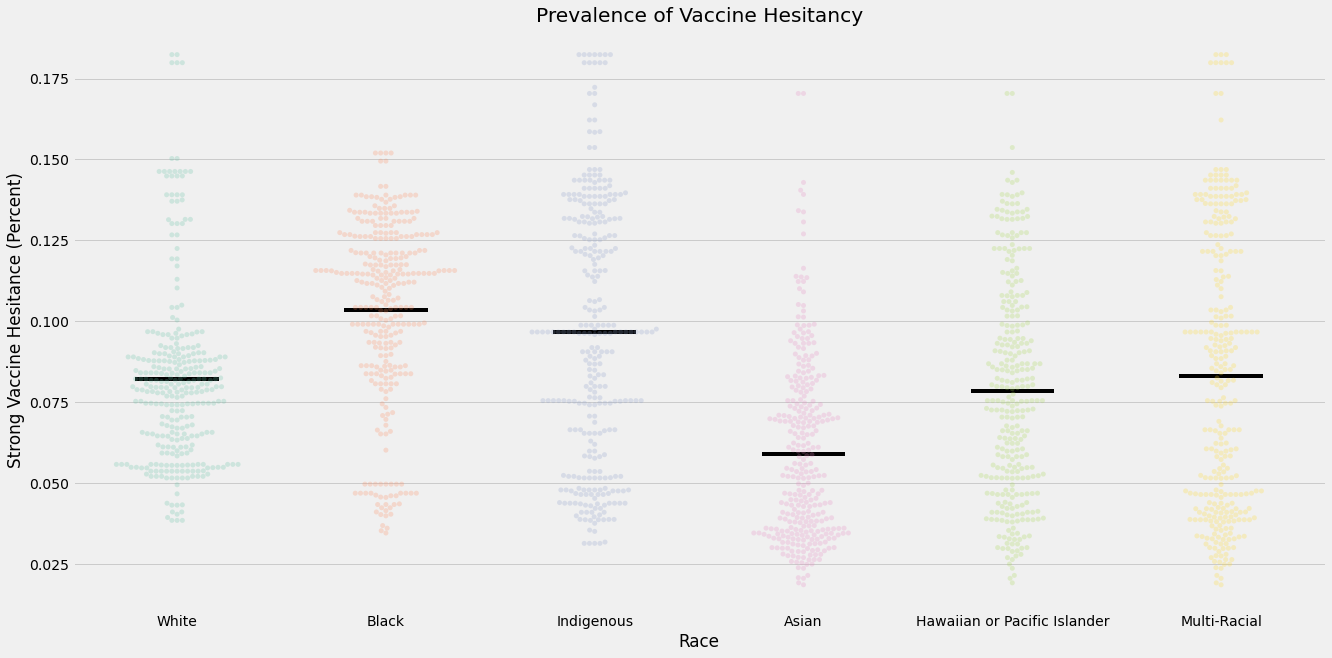

In [145]:
fig = plt.figure(figsize=(20, 10))

ax = sns.swarmplot(
    x ="Race", 
    y ="Strong Vaccine Hesitance (Percent)", 
    data = plot_data, 
    palette="Set2",
    edgecolor="gray", 
    alpha=0.25)

median_width = 0.4

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = text.get_text()  # "X" or "Y"

    # calculate the median value for all replicates of either X or Y
    median_val = plot_data[plot_data['Race']==sample_name].mean()

    # plot horizontal lines across the column, centered on the tick
    ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=4, color='k', zorder=1)
ax.set_title("Prevalence of Vaccine Hesitancy")
plt.savefig("../images/vax_hesitance_swarm.png")
plt.show()